In [2]:
import bike_count as bc
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import holidays
from pathlib import Path
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from flaml import AutoML
from xgboost import XGBRegressor
from prophet import Prophet
import importlib

c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [33]:
importlib.reload(bc)

X, y = bc.get_model_data()
X_merge = bc._merge_external_data(X)

      numer_sta                date    pmer  tend  cod_tend   dd   ff       t  \
0          7149 2021-01-01 00:00:00  100810    80         1  270  1.8  272.75   
1          7149 2021-01-01 03:00:00  100920   110         3  300  1.7  271.25   
2          7149 2021-01-01 06:00:00  100950    30         3  290  2.6  271.95   
3          7149 2021-01-01 09:00:00  101100   150         2  280  1.7  272.45   
4          7149 2021-01-01 12:00:00  101110    30         0   50  1.0  276.95   
...         ...                 ...     ...   ...       ...  ...  ...     ...   
3317       7149 2020-09-30 09:00:00  101540   -30         8  230  4.4  289.95   
3318       7149 2020-09-30 12:00:00  101320  -210         8  190  4.9  292.05   
3319       7149 2020-09-30 15:00:00  101140  -180         7  190  4.1  291.55   
3320       7149 2020-09-30 18:00:00  101020  -130         6  190  2.7  290.15   
3321       7149 2020-09-30 21:00:00  100880  -140         8  170  2.4  288.35   

          td   u  ...  hnua

In [34]:
X_merge.isna().sum()
X_merge["bike_count"] = np.exp(y)
X_merge.drop(
    [
        "counter_id",
        "counter_name",
        "site_id",
        "site_name",
        "date",
        "counter_installation_date",
        "coordinates",
        "counter_technical_id",
        "latitude",
        "longitude",
    ],
    axis=1,
    inplace=True,
)

In [38]:
corr_matrix = X_merge.corr()

In [37]:
corr_matrix.iloc[:, -1].sort_values(ascending=False).abs().head()

bike_count    1.000000
t             0.254320
tx12          0.219782
tn12          0.184893
td            0.098675
Name: bike_count, dtype: float64

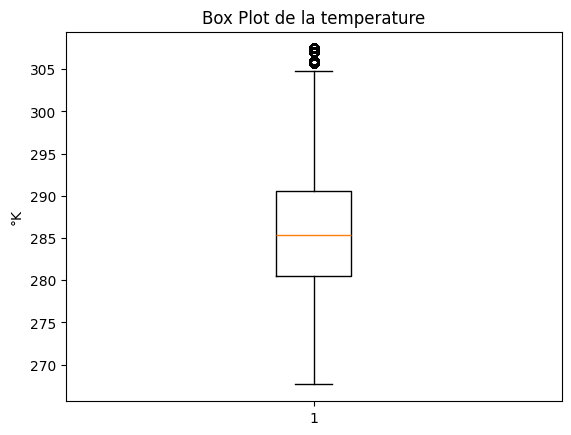

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(X_merge["t"])
plt.title("Box Plot de la temperature")
plt.ylabel("°K")
plt.show()